<a href="https://colab.research.google.com/github/mdmarghe/DeepLearning/blob/main/MultiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATI
  

##Dataset


In [38]:
from keras.datasets import reuters

In [39]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [40]:
len(train_data)


8982

In [41]:
len(test_data)

2246

In [42]:
train_data[10] #le parole piu importanti fra le 10000 presenti nel 10imo articolo del ds

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [43]:
#decidoficare i dati
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])

In [44]:
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

Gli articoli da classificare sono mono etichetta e le etichette sono 46 in totale

##Preparazione dati

In [45]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1
  return results

In [46]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [47]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

Dobbiamo vettorizzare anche le labels: possiamo farlo tramite hotencoding


In [48]:
def to_one_hot(labels, dimension=46):
  results=np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label]=1
  return results

In [49]:
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [50]:
one_hot_train_labels[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Possiamo vettorizzare le etichette tramite categorizzazione fornita da keras (come per MNIST)

In [51]:
from keras.utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

#Creazione della rete

In [52]:
from keras import layers, models

In [53]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [54]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

##Convalida approccio

In [55]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

##Addestramento modello

In [56]:
history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3986 - loss: 3.1898 - val_accuracy: 0.6160 - val_loss: 1.8942
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.6435 - loss: 1.7027 - val_accuracy: 0.6830 - val_loss: 1.4575
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.7273 - loss: 1.2508 - val_accuracy: 0.7240 - val_loss: 1.2412
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7759 - loss: 1.0161 - val_accuracy: 0.7450 - val_loss: 1.1130
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8240 - loss: 0.8273 - val_accuracy: 0.7660 - val_loss: 1.0439
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8464 - loss: 0.7230 - val_accuracy: 0.7850 - val_loss: 0.9746
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8765 - loss: 0.5815 - val_accuracy: 0.7980 - val_loss: 0.9612
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8955 - loss: 0.4965 - val_accuracy: 0.7920 - v

##Tracciamento del valore di loss e accuracy


In [57]:
import matplotlib.pyplot as plt

In [58]:
loss=history.history['loss']
val_loss=history.history['val_loss']

In [59]:
epochs=range(1, len(loss)+1)

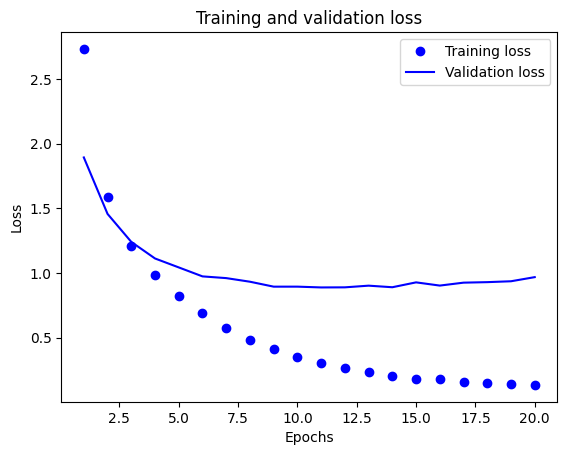

In [60]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


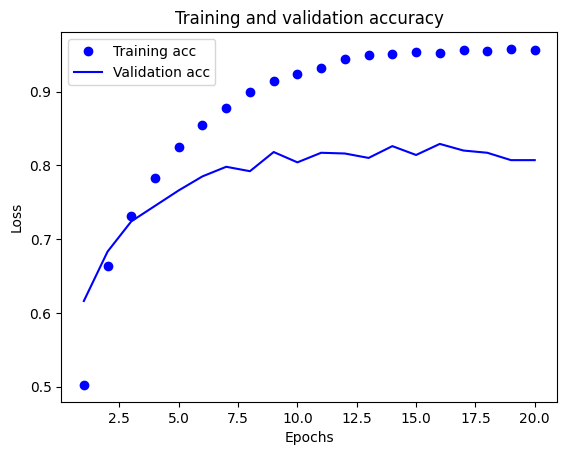

In [61]:
plt.clf()                                                #1

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#1 - Clears the figure


##Retrain post convalida

In [62]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [63]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9614 - loss: 0.1003 - val_accuracy: 0.8090 - val_loss: 1.0208
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9616 - loss: 0.1036 - val_accuracy: 0.8130 - val_loss: 0.9892
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9609 - loss: 0.1019 - val_accuracy: 0.8080 - val_loss: 0.9717
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9642 - loss: 0.0993 - val_accuracy: 0.7980 - val_loss: 1.0309
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9615 - loss: 0.1014 - val_accuracy: 0.8040 - val_loss: 1.0364
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9619 - loss: 0.0945 - val_accuracy: 0.8030 - val_loss: 1.0346
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9599 - loss: 0.0973 - val_accuracy: 0.8060 - val_loss: 1.0204
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9657 - loss: 0.0894 - val_accuracy: 0.8060 - val_loss:

In [71]:
results=model.evaluate(x_test, one_hot_test_labels)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7894 - loss: 1.1436


[1.175502896308899, 0.7782725095748901]

Paragoniamo il risultato con un approccio di classificazione puramente casuale

In [72]:
>>> import copy
>>> test_labels_copy = copy.copy(test_labels)
>>> np.random.shuffle(test_labels_copy)
>>> hits_array = np.array(test_labels) == np.array(test_labels_copy)
>>> float(np.sum(hits_array)) / len(test_labels)


0.18788958147818344

##Generare predizioni su nuovi dati